In [1]:
import pandas as pd
# from sodapy import Socrata
# from api_keys import my_app_token
# from api_keys import chicago_password
# from api_keys import chicago_username
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [2]:
# #Access ride share data 2022
# client = Socrata("data.cityofchicago.org",
#                 my_app_token,
#                 username=chicago_username,
#                 password=chicago_password)

# ride_results = client.get("2tdj-ffvb", limit=2000000)  #Ride share has 69M records for 2022 w an avg of 5.75M per month

# # Convert to pandas DataFrame
# ride_results_df = pd.DataFrame.from_records(ride_results)

input_file_path = "TNP_trips_350K.csv"

# Read the CSV file into the DataFrame
ride_results_df = pd.read_csv(input_file_path)

# Convert column names to snake_case
ride_results_df.columns = ride_results_df.columns.str.lower().str.replace(' ', '_')

ride_results_df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,5fd670ba8681717af8db2b16fcff532327f164f7,11/12/2022 06:45:00 AM,11/12/2022 07:00:00 AM,542.0,1.5,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,2.91,7.91,False,1,41.938232,-87.646782,POINT (-87.6467820813 41.938232293),41.938232,-87.646782,POINT (-87.6467820813 41.938232293)
1,0d7c0a816f611efe0d527542cd50e69422306ced,05/31/2022 06:00:00 PM,05/31/2022 06:15:00 PM,847.0,2.8,1.703183e+10,1.703108e+10,28.0,8.0,12.5,...,4.87,20.37,False,1,41.879067,-87.657005,POINT (-87.657005027 41.8790669938),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
2,b7cf20782d69c871cb6bf21a9c5ef9071035f401,10/28/2022 06:45:00 AM,10/28/2022 07:15:00 AM,2143.0,33.6,NaN,1.703198e+10,NaN,76.0,42.5,...,33.20,86.70,False,1,NaN,NaN,NaN,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)
3,a06fb9215324ffc2cd8a1d7d3e6b30a2b3bac591,08/08/2022 12:30:00 PM,08/08/2022 01:00:00 PM,1949.0,18.0,1.703198e+10,1.703108e+10,76.0,8.0,30.0,...,6.81,43.81,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495)
4,73fd509eae177a619e83d4e42ff6f1cd5537ba94,12/19/2022 08:30:00 PM,12/19/2022 08:30:00 PM,258.0,1.1,1.703107e+10,1.703108e+10,7.0,8.0,5.0,...,4.66,9.66,False,1,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.909496,-87.630964,POINT (-87.630963601 41.9094956686)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,e1b5bc059358e0e98df3c958d797ca20da50d2ca,03/24/2022 02:45:00 PM,03/24/2022 02:45:00 PM,375.0,1.6,1.703107e+10,1.703108e+10,7.0,8.0,7.5,...,4.66,15.16,False,1,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.902788,-87.626146,POINT (-87.6261455896 41.9027880476)
349996,503f67c2e6b08530e32468a8dc544c0cdbd7b883,06/02/2022 02:30:00 PM,06/02/2022 02:45:00 PM,977.0,3.8,NaN,NaN,24.0,23.0,15.0,...,1.28,16.28,False,1,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.900070,-87.720918,POINT (-87.7209182385 41.9000696026)
349997,380e373293d99f6f29c64bd756ba68c7d4602b53,06/04/2022 10:15:00 PM,06/04/2022 10:45:00 PM,1873.0,8.1,NaN,NaN,7.0,60.0,35.0,...,4.44,47.44,False,1,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.836150,-87.648788,POINT (-87.6487879519 41.8361501547)
349998,4db7f98bb304a9262762465d1c5e9a74061c7298,10/19/2022 12:45:00 AM,10/19/2022 12:45:00 AM,251.0,0.9,1.703107e+10,1.703106e+10,7.0,6.0,5.0,...,2.91,7.91,False,1,41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),41.936237,-87.656412,POINT (-87.6564115308 41.9362371791)


In [3]:
#Formatting Step
drop = ["pickup_census_tract",
        "dropoff_census_tract",
        "shared_trip_authorized",
        "trips_pooled",
        "pickup_centroid_location",
        "dropoff_centroid_location"]

ride_df = ride_results_df.drop(drop, axis=1)
ride_df = ride_df.dropna(how='any')
ride_df['pickup_centroid_latitude'] = ride_df['pickup_centroid_latitude'].astype(float)
ride_df['pickup_centroid_longitude'] = ride_df['pickup_centroid_longitude'].astype(float)
ride_df['dropoff_centroid_latitude'] = ride_df['dropoff_centroid_latitude'].astype(float)
ride_df['dropoff_centroid_longitude'] = ride_df['dropoff_centroid_longitude'].astype(float)

ride_df.rename(columns={'pickup_centroid_latitude': 'pickup_lat',
                         'pickup_centroid_longitude': 'pickup_lon',
                         'dropoff_centroid_latitude': 'dropoff_lat',
                         'dropoff_centroid_longitude': 'dropoff_lon'
                         }, inplace=True)

ride_df


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
0,5fd670ba8681717af8db2b16fcff532327f164f7,11/12/2022 06:45:00 AM,11/12/2022 07:00:00 AM,542.0,1.5,6.0,6.0,5.0,0.0,2.91,7.91,41.938232,-87.646782,41.938232,-87.646782
1,0d7c0a816f611efe0d527542cd50e69422306ced,05/31/2022 06:00:00 PM,05/31/2022 06:15:00 PM,847.0,2.8,28.0,8.0,12.5,3.0,4.87,20.37,41.879067,-87.657005,41.892508,-87.626215
3,a06fb9215324ffc2cd8a1d7d3e6b30a2b3bac591,08/08/2022 12:30:00 PM,08/08/2022 01:00:00 PM,1949.0,18.0,76.0,8.0,30.0,7.0,6.81,43.81,41.979071,-87.903040,41.895033,-87.619711
4,73fd509eae177a619e83d4e42ff6f1cd5537ba94,12/19/2022 08:30:00 PM,12/19/2022 08:30:00 PM,258.0,1.1,7.0,8.0,5.0,0.0,4.66,9.66,41.922083,-87.634156,41.909496,-87.630964
5,5315201b4fb34fde00d38517132e954b9ab63154,06/03/2022 07:45:00 PM,06/03/2022 08:00:00 PM,289.0,1.1,5.0,5.0,5.0,0.0,2.91,7.91,41.947792,-87.683835,41.947792,-87.683835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,e1b5bc059358e0e98df3c958d797ca20da50d2ca,03/24/2022 02:45:00 PM,03/24/2022 02:45:00 PM,375.0,1.6,7.0,8.0,7.5,3.0,4.66,15.16,41.922083,-87.634156,41.902788,-87.626146
349996,503f67c2e6b08530e32468a8dc544c0cdbd7b883,06/02/2022 02:30:00 PM,06/02/2022 02:45:00 PM,977.0,3.8,24.0,23.0,15.0,0.0,1.28,16.28,41.901207,-87.676356,41.900070,-87.720918
349997,380e373293d99f6f29c64bd756ba68c7d4602b53,06/04/2022 10:15:00 PM,06/04/2022 10:45:00 PM,1873.0,8.1,7.0,60.0,35.0,8.0,4.44,47.44,41.922686,-87.649489,41.836150,-87.648788
349998,4db7f98bb304a9262762465d1c5e9a74061c7298,10/19/2022 12:45:00 AM,10/19/2022 12:45:00 AM,251.0,0.9,7.0,6.0,5.0,0.0,2.91,7.91,41.929047,-87.651311,41.936237,-87.656412


In [4]:
#Convert timestamp columns to data type = datetime
ride_df['trip_start_timestamp'] = pd.to_datetime(ride_df['trip_start_timestamp'])
ride_df['trip_end_timestamp'] = pd.to_datetime(ride_df['trip_end_timestamp'])

#split out timestamp into new columns date, time
ride_df['start_date'] = ride_df['trip_start_timestamp'].dt.date
ride_df['start_time'] = ride_df['trip_start_timestamp'].dt.time
ride_df['end_date'] = ride_df['trip_end_timestamp'].dt.date
ride_df['end_time'] = ride_df['trip_end_timestamp'].dt.time
ride_df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,start_date,start_time,end_date,end_time
0,5fd670ba8681717af8db2b16fcff532327f164f7,2022-11-12 06:45:00,2022-11-12 07:00:00,542.0,1.5,6.0,6.0,5.0,0.0,2.91,7.91,41.938232,-87.646782,41.938232,-87.646782,2022-11-12,06:45:00,2022-11-12,07:00:00
1,0d7c0a816f611efe0d527542cd50e69422306ced,2022-05-31 18:00:00,2022-05-31 18:15:00,847.0,2.8,28.0,8.0,12.5,3.0,4.87,20.37,41.879067,-87.657005,41.892508,-87.626215,2022-05-31,18:00:00,2022-05-31,18:15:00
3,a06fb9215324ffc2cd8a1d7d3e6b30a2b3bac591,2022-08-08 12:30:00,2022-08-08 13:00:00,1949.0,18.0,76.0,8.0,30.0,7.0,6.81,43.81,41.979071,-87.903040,41.895033,-87.619711,2022-08-08,12:30:00,2022-08-08,13:00:00
4,73fd509eae177a619e83d4e42ff6f1cd5537ba94,2022-12-19 20:30:00,2022-12-19 20:30:00,258.0,1.1,7.0,8.0,5.0,0.0,4.66,9.66,41.922083,-87.634156,41.909496,-87.630964,2022-12-19,20:30:00,2022-12-19,20:30:00
5,5315201b4fb34fde00d38517132e954b9ab63154,2022-06-03 19:45:00,2022-06-03 20:00:00,289.0,1.1,5.0,5.0,5.0,0.0,2.91,7.91,41.947792,-87.683835,41.947792,-87.683835,2022-06-03,19:45:00,2022-06-03,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,e1b5bc059358e0e98df3c958d797ca20da50d2ca,2022-03-24 14:45:00,2022-03-24 14:45:00,375.0,1.6,7.0,8.0,7.5,3.0,4.66,15.16,41.922083,-87.634156,41.902788,-87.626146,2022-03-24,14:45:00,2022-03-24,14:45:00
349996,503f67c2e6b08530e32468a8dc544c0cdbd7b883,2022-06-02 14:30:00,2022-06-02 14:45:00,977.0,3.8,24.0,23.0,15.0,0.0,1.28,16.28,41.901207,-87.676356,41.900070,-87.720918,2022-06-02,14:30:00,2022-06-02,14:45:00
349997,380e373293d99f6f29c64bd756ba68c7d4602b53,2022-06-04 22:15:00,2022-06-04 22:45:00,1873.0,8.1,7.0,60.0,35.0,8.0,4.44,47.44,41.922686,-87.649489,41.836150,-87.648788,2022-06-04,22:15:00,2022-06-04,22:45:00
349998,4db7f98bb304a9262762465d1c5e9a74061c7298,2022-10-19 00:45:00,2022-10-19 00:45:00,251.0,0.9,7.0,6.0,5.0,0.0,2.91,7.91,41.929047,-87.651311,41.936237,-87.656412,2022-10-19,00:45:00,2022-10-19,00:45:00


In [5]:
input_file_path = "Taxi_trips_32K.csv"

# Read the CSV file into the DataFrame
taxi_results_df = pd.read_csv(input_file_path)

# Convert column names to snake_case
taxi_results_df.columns = taxi_results_df.columns.str.lower().str.replace(' ', '_')

taxi_results_df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid__location
0,e8489b39a088ebf844047c6b0a676ca9a5173207,41b52039f81d93468b1686459508da86e96d96e6c8d715...,03/16/2022 12:15:00 PM,03/16/2022 12:30:00 PM,480.0,0.00,1.703128e+10,1.703132e+10,28.0,32.0,...,0.0,6.50,Cash,"Taxicab Insurance Agency, LLC",41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,95b89ee2c049cbe96789d762dda9261ba7eec391,a83d0757369e84e2567b6d31793b04221b7087c4f99083...,01/14/2022 11:30:00 AM,01/14/2022 11:45:00 AM,540.0,1.62,1.703108e+10,1.703128e+10,8.0,28.0,...,0.0,12.75,Credit Card,Flash Cab,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
2,fd6c5e4607ffa204edc835ab552deca30076c432,e8ebe1fb12cc70947d4031ad2982bd07dee6c4a3b7d381...,03/01/2022 01:15:00 AM,03/01/2022 01:15:00 AM,681.0,7.11,NaN,NaN,76.0,17.0,...,5.0,28.00,Credit Card,Flash Cab,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.946511,-87.806020,POINT (-87.8060200025 41.9465114202)
3,5e0120741354f6895623215570f4c60c48852c41,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,03/28/2022 02:30:00 PM,03/28/2022 02:45:00 PM,540.0,1.10,NaN,NaN,6.0,6.0,...,0.0,6.75,Cash,Taxi Affiliation Services,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
4,f710aa6f67b51c57410d6546d55ddfe806441814,bf0b987f41a8c368a072da293f9fb1aecc8a39763ab6a4...,12/31/2022 08:15:00 PM,12/31/2022 08:30:00 PM,1484.0,12.19,NaN,NaN,NaN,4.0,...,5.0,44.10,Credit Card,Flash Cab,NaN,NaN,NaN,41.975171,-87.687516,POINT (-87.6875155152 41.9751709433)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32318,06dbbee041b78489690e3392b607732e14cac808,4c658dc5e7ea935f4c3bb9a3071f509efac3e99c93f6a6...,08/17/2022 12:45:00 PM,08/17/2022 01:30:00 PM,2076.0,22.61,NaN,NaN,8.0,NaN,...,0.0,57.53,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
32319,ea327414a034f3d41685add8a8b79a675dcf061b,f2b35bd8a42c347d4a147be4c9b2f6977add46e98e203a...,06/26/2022 07:30:00 AM,06/26/2022 07:45:00 AM,662.0,2.85,1.703108e+10,1.703184e+10,8.0,33.0,...,1.5,15.30,Credit Card,Sun Taxi,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.849247,-87.624135,POINT (-87.6241352979 41.8492467545)
32320,46054fdc86848119afb55f715226b5b5da67163d,4cf389626b3d1df35aef815a964571fd5ea7dddda01e56...,05/19/2022 12:45:00 PM,05/19/2022 01:00:00 PM,832.0,4.45,NaN,NaN,8.0,6.0,...,1.0,15.50,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
32321,374c9a3cf1b47a6b503161272ee281e25a04a24e,3b084cc9045b3afc1c8bb8b5b76921d8e41c00494b15bd...,11/12/2022 05:45:00 PM,11/12/2022 05:45:00 PM,474.0,0.72,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,6.25,Cash,Globe Taxi,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


In [6]:
#Format Step
drop = ["pickup_census_tract",
        "dropoff_census_tract",
        "pickup_centroid_location",
        "dropoff_centroid__location"]

taxi_df = taxi_results_df.drop(drop, axis=1)
taxi_df = taxi_df.dropna(how = 'any')
taxi_df['pickup_centroid_latitude'] = taxi_df['pickup_centroid_latitude'].astype(float)
taxi_df['pickup_centroid_longitude'] = taxi_df['pickup_centroid_longitude'].astype(float)
taxi_df['dropoff_centroid_latitude'] = taxi_df['dropoff_centroid_latitude'].astype(float)
taxi_df['dropoff_centroid_longitude'] = taxi_df['dropoff_centroid_longitude'].astype(float)

taxi_df.rename(columns={'pickup_centroid_latitude': 'pickup_lat',
                         'pickup_centroid_longitude': 'pickup_lon',
                         'dropoff_centroid_latitude': 'dropoff_lat',
                         'dropoff_centroid_longitude': 'dropoff_lon'
                         }, inplace=True)

taxi_df


,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
0,e8489b39a088ebf844047c6b0a676ca9a5173207,41b52039f81d93468b1686459508da86e96d96e6c8d715...,03/16/2022 12:15:00 PM,03/16/2022 12:30:00 PM,480.0,0.00,28.0,32.0,6.50,0.00,0.0,0.0,6.50,Cash,"Taxicab Insurance Agency, LLC",41.879255,-87.642649,41.884987,-87.620993
1,95b89ee2c049cbe96789d762dda9261ba7eec391,a83d0757369e84e2567b6d31793b04221b7087c4f99083...,01/14/2022 11:30:00 AM,01/14/2022 11:45:00 AM,540.0,1.62,8.0,28.0,8.25,4.00,0.0,0.0,12.75,Credit Card,Flash Cab,41.892508,-87.626215,41.879255,-87.642649
2,fd6c5e4607ffa204edc835ab552deca30076c432,e8ebe1fb12cc70947d4031ad2982bd07dee6c4a3b7d381...,03/01/2022 01:15:00 AM,03/01/2022 01:15:00 AM,681.0,7.11,76.0,17.0,19.50,3.00,0.0,5.0,28.00,Credit Card,Flash Cab,41.980264,-87.913625,41.946511,-87.806020
3,5e0120741354f6895623215570f4c60c48852c41,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,03/28/2022 02:30:00 PM,03/28/2022 02:45:00 PM,540.0,1.10,6.0,6.0,6.75,0.00,0.0,0.0,6.75,Cash,Taxi Affiliation Services,41.944227,-87.655998,41.944227,-87.655998
5,0b4fb04bce6a4322515db05457453d74ab0027a6,2ee014517008727c09c564f78b483383c62d85e7d5f0f8...,12/14/2022 12:30:00 PM,12/14/2022 12:45:00 PM,610.0,1.48,28.0,32.0,8.00,2.00,0.0,1.0,11.50,Credit Card,Taxicab Insurance Agency Llc,41.879255,-87.642649,41.870607,-87.622173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32317,ebb2d3bfac0f6181c9261eb794ffeca94c934920,a2c933ca0489813d4f5b49f79aa6c6b5701ef589bdc503...,06/27/2022 04:00:00 PM,06/27/2022 04:00:00 PM,240.0,0.70,32.0,32.0,5.25,0.00,0.0,0.0,5.25,Cash,"Taxicab Insurance Agency, LLC",41.884987,-87.620993,41.880994,-87.632746
32319,ea327414a034f3d41685add8a8b79a675dcf061b,f2b35bd8a42c347d4a147be4c9b2f6977add46e98e203a...,06/26/2022 07:30:00 AM,06/26/2022 07:45:00 AM,662.0,2.85,8.0,33.0,10.75,2.55,0.0,1.5,15.30,Credit Card,Sun Taxi,41.890922,-87.618868,41.849247,-87.624135
32320,46054fdc86848119afb55f715226b5b5da67163d,4cf389626b3d1df35aef815a964571fd5ea7dddda01e56...,05/19/2022 12:45:00 PM,05/19/2022 01:00:00 PM,832.0,4.45,8.0,6.0,14.50,0.00,0.0,1.0,15.50,Cash,Flash Cab,41.899602,-87.633308,41.944227,-87.655998
32321,374c9a3cf1b47a6b503161272ee281e25a04a24e,3b084cc9045b3afc1c8bb8b5b76921d8e41c00494b15bd...,11/12/2022 05:45:00 PM,11/12/2022 05:45:00 PM,474.0,0.72,8.0,8.0,6.25,0.00,0.0,0.0,6.25,Cash,Globe Taxi,41.890922,-87.618868,41.892042,-87.631864


In [7]:
#Convert timestamp columns to data type = datetime
taxi_df['trip_start_timestamp'] = pd.to_datetime(taxi_df['trip_start_timestamp'])
taxi_df['trip_end_timestamp'] = pd.to_datetime(taxi_df['trip_end_timestamp'])

#split out timestamp into new columns date, time
taxi_df['start_date'] = taxi_df['trip_start_timestamp'].dt.date
taxi_df['start_time'] = taxi_df['trip_start_timestamp'].dt.time
taxi_df['end_date'] = taxi_df['trip_end_timestamp'].dt.date
taxi_df['end_time'] = taxi_df['trip_end_timestamp'].dt.time
taxi_df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,payment_type,company,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,start_date,start_time,end_date,end_time
0,e8489b39a088ebf844047c6b0a676ca9a5173207,41b52039f81d93468b1686459508da86e96d96e6c8d715...,2022-03-16 12:15:00,2022-03-16 12:30:00,480.0,0.00,28.0,32.0,6.50,0.00,...,Cash,"Taxicab Insurance Agency, LLC",41.879255,-87.642649,41.884987,-87.620993,2022-03-16,12:15:00,2022-03-16,12:30:00
1,95b89ee2c049cbe96789d762dda9261ba7eec391,a83d0757369e84e2567b6d31793b04221b7087c4f99083...,2022-01-14 11:30:00,2022-01-14 11:45:00,540.0,1.62,8.0,28.0,8.25,4.00,...,Credit Card,Flash Cab,41.892508,-87.626215,41.879255,-87.642649,2022-01-14,11:30:00,2022-01-14,11:45:00
2,fd6c5e4607ffa204edc835ab552deca30076c432,e8ebe1fb12cc70947d4031ad2982bd07dee6c4a3b7d381...,2022-03-01 01:15:00,2022-03-01 01:15:00,681.0,7.11,76.0,17.0,19.50,3.00,...,Credit Card,Flash Cab,41.980264,-87.913625,41.946511,-87.806020,2022-03-01,01:15:00,2022-03-01,01:15:00
3,5e0120741354f6895623215570f4c60c48852c41,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,2022-03-28 14:30:00,2022-03-28 14:45:00,540.0,1.10,6.0,6.0,6.75,0.00,...,Cash,Taxi Affiliation Services,41.944227,-87.655998,41.944227,-87.655998,2022-03-28,14:30:00,2022-03-28,14:45:00
5,0b4fb04bce6a4322515db05457453d74ab0027a6,2ee014517008727c09c564f78b483383c62d85e7d5f0f8...,2022-12-14 12:30:00,2022-12-14 12:45:00,610.0,1.48,28.0,32.0,8.00,2.00,...,Credit Card,Taxicab Insurance Agency Llc,41.879255,-87.642649,41.870607,-87.622173,2022-12-14,12:30:00,2022-12-14,12:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32317,ebb2d3bfac0f6181c9261eb794ffeca94c934920,a2c933ca0489813d4f5b49f79aa6c6b5701ef589bdc503...,2022-06-27 16:00:00,2022-06-27 16:00:00,240.0,0.70,32.0,32.0,5.25,0.00,...,Cash,"Taxicab Insurance Agency, LLC",41.884987,-87.620993,41.880994,-87.632746,2022-06-27,16:00:00,2022-06-27,16:00:00
32319,ea327414a034f3d41685add8a8b79a675dcf061b,f2b35bd8a42c347d4a147be4c9b2f6977add46e98e203a...,2022-06-26 07:30:00,2022-06-26 07:45:00,662.0,2.85,8.0,33.0,10.75,2.55,...,Credit Card,Sun Taxi,41.890922,-87.618868,41.849247,-87.624135,2022-06-26,07:30:00,2022-06-26,07:45:00
32320,46054fdc86848119afb55f715226b5b5da67163d,4cf389626b3d1df35aef815a964571fd5ea7dddda01e56...,2022-05-19 12:45:00,2022-05-19 13:00:00,832.0,4.45,8.0,6.0,14.50,0.00,...,Cash,Flash Cab,41.899602,-87.633308,41.944227,-87.655998,2022-05-19,12:45:00,2022-05-19,13:00:00
32321,374c9a3cf1b47a6b503161272ee281e25a04a24e,3b084cc9045b3afc1c8bb8b5b76921d8e41c00494b15bd...,2022-11-12 17:45:00,2022-11-12 17:45:00,474.0,0.72,8.0,8.0,6.25,0.00,...,Cash,Globe Taxi,41.890922,-87.618868,41.892042,-87.631864,2022-11-12,17:45:00,2022-11-12,17:45:00


In [8]:
#Analyze the fare amts between ride share and taxi

#Convert fare data type from object to numeric
ride_df['fare'] = pd.to_numeric(ride_df['fare'])
taxi_df['fare'] = pd.to_numeric(taxi_df['fare'])

#Convert end_date to numeric for both services
ride_df['end_date'] = pd.to_datetime(ride_df['end_date'])
taxi_df['end_date'] = pd.to_datetime(taxi_df['end_date'])

#Set end_date as the index for each df
ride_df.set_index('end_date', inplace=True)
taxi_df.set_index('end_date', inplace=True)

#calculate mean fair amt per month for each service
ride_fare_mean = ride_df.resample('M')['fare'].mean()
taxi_fare_mean = taxi_df.resample('M')['fare'].mean()

#create df for plotting
fare_df = pd.DataFrame(
    {
        'Ride Share': ride_fare_mean,
        'Taxi': taxi_fare_mean
    })

fare_df

,Ride Share,Taxi
end_date,,
2022-01-31,13.156708,17.865312
2022-02-28,15.882338,17.057450
2022-03-31,16.725285,18.646472
2022-04-30,17.040572,19.428798
2022-05-31,18.535322,23.540564
2022-06-30,19.216196,21.562910
2022-07-31,16.916894,19.179804
2022-08-31,16.907829,18.823990
2022-09-30,18.708552,20.349147


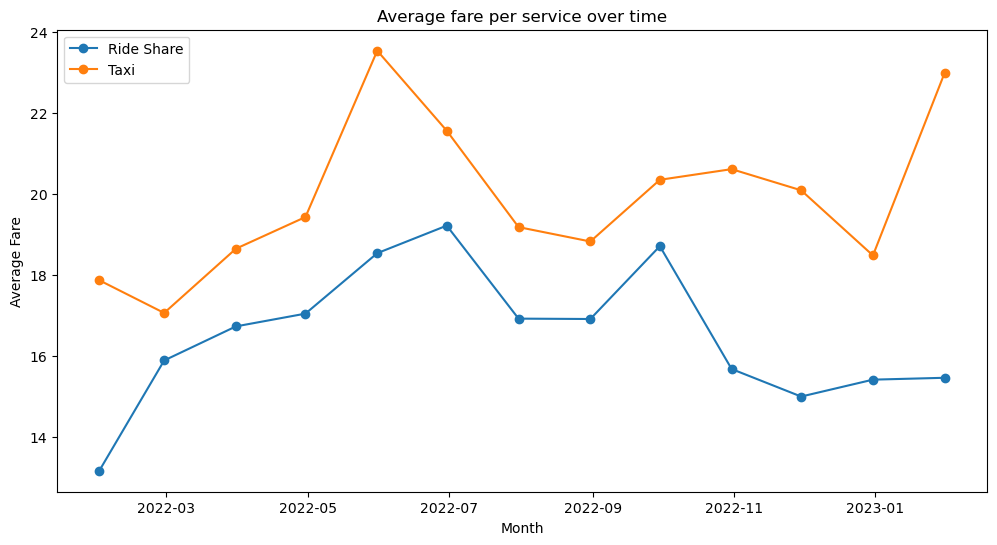

In [9]:
#Plot the findings
plt.figure(figsize = (12,6))

plt.plot(fare_df.index, fare_df['Ride Share'], label = 'Ride Share', marker = 'o')
plt.plot(fare_df.index, fare_df['Taxi'], label = 'Taxi', marker = 'o')

plt.title('Average fare per service over time')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.legend()

plt.show()

In [10]:
#Comparison off
fare_df

,Ride Share,Taxi
end_date,,
2022-01-31,13.156708,17.865312
2022-02-28,15.882338,17.057450
2022-03-31,16.725285,18.646472
2022-04-30,17.040572,19.428798
2022-05-31,18.535322,23.540564
2022-06-30,19.216196,21.562910
2022-07-31,16.916894,19.179804
2022-08-31,16.907829,18.823990
2022-09-30,18.708552,20.349147


In [11]:
print(ride_df.index.min())
print(ride_df.index.max())

2022-01-01 00:00:00
2023-01-01 00:00:00


In [12]:
print(taxi_df.index.min())
print(taxi_df.index.max())

2022-01-01 00:00:00
2023-01-01 00:00:00


C:\Users\jaxio\AppData\Local\Temp\ipykernel_2780\2282476967.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ride_df.drop('z_score', axis=1, inplace=True)
C:\Users\jaxio\AppData\Local\Temp\ipykernel_2780\2282476967.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_taxi_df.drop('z_score', axis=1, inplace=True)


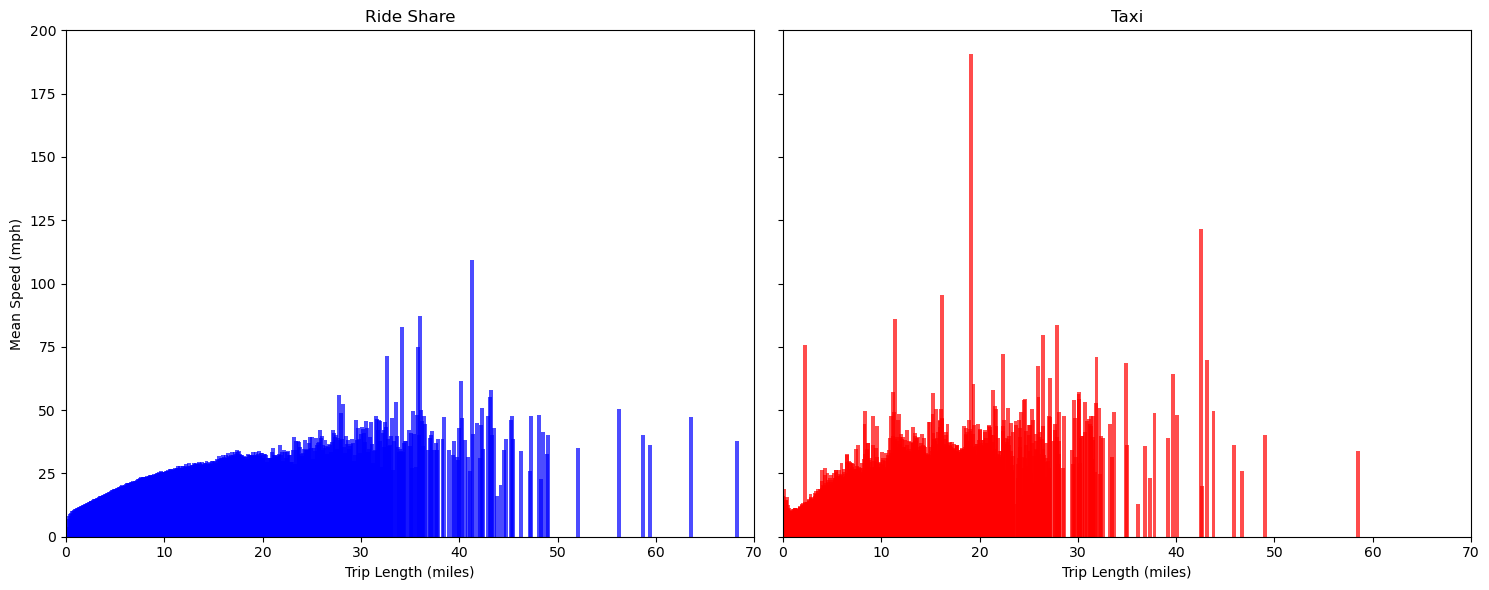

Ride Share Data:
Average Speed (mph): 17.70
Average Distance (miles): 5.19

Taxi Data:
Average Speed (mph): 15.01
Average Distance (miles): 5.40


In [13]:
# Comparing average speed in mph

# Create the "speed_mph" column and handle zeros as before
ride_df['speed_mph'] = (ride_df['trip_miles'] / (ride_df['trip_seconds'] / 3600)).round(2)
ride_df['speed_mph'] = np.where((ride_df['trip_miles'] == 0) | (ride_df['trip_seconds'] == 0), 0, ride_df['speed_mph'])

taxi_df['speed_mph'] = (taxi_df['trip_miles'] / (taxi_df['trip_seconds'] / 3600)).round(2)
taxi_df['speed_mph'] = np.where((taxi_df['trip_miles'] == 0) | (taxi_df['trip_seconds'] == 0), 0, taxi_df['speed_mph'])

# Define the z-score threshold for outliers (e.g., 3 standard deviations)
z_score_threshold = 3

# Find outliers in ride_df and taxi_df using z-score
ride_df['z_score'] = np.abs(stats.zscore(ride_df['speed_mph']))
taxi_df['z_score'] = np.abs(stats.zscore(taxi_df['speed_mph']))

# Filter out the outliers from both DataFrames
filtered_ride_df = ride_df[ride_df['z_score'] <= z_score_threshold]
filtered_taxi_df = taxi_df[taxi_df['z_score'] <= z_score_threshold]

# Remove the z-score column (not needed anymore)
filtered_ride_df.drop('z_score', axis=1, inplace=True)
filtered_taxi_df.drop('z_score', axis=1, inplace=True)

# Calculate mean speed for each trip length category
ride_speed_by_length = filtered_ride_df.groupby('trip_miles')['speed_mph'].mean()
taxi_speed_by_length = filtered_taxi_df.groupby('trip_miles')['speed_mph'].mean()

# Create two subplots for ride share and taxi data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot ride share data in the first subplot
ax1.bar(ride_speed_by_length.index, ride_speed_by_length.values, color='blue', width=0.4, alpha=0.7)
ax1.set_title('Ride Share')
ax1.set_xlabel('Trip Length (miles)')
ax1.set_ylabel('Mean Speed (mph)')
ax1.set_xlim(0, 70)

# Plot taxi data in the second subplot
ax2.bar(taxi_speed_by_length.index, taxi_speed_by_length.values, color='red', width=0.4, alpha=0.7)
ax2.set_title('Taxi')
ax2.set_xlabel('Trip Length (miles)')
ax2.set_xlim(0, 70)

# Show the subplots
plt.tight_layout()
plt.show()

# Calculate the average speed and distance for ride share data
average_ride_speed = filtered_ride_df['speed_mph'].mean()
average_ride_distance = filtered_ride_df['trip_miles'].mean()

# Calculate the average speed and distance for taxi data
average_taxi_speed = filtered_taxi_df['speed_mph'].mean()
average_taxi_distance = filtered_taxi_df['trip_miles'].mean()

# Print the results
print("Ride Share Data:")
print(f"Average Speed (mph): {average_ride_speed:.2f}")
print(f"Average Distance (miles): {average_ride_distance:.2f}")

print("\nTaxi Data:")
print(f"Average Speed (mph): {average_taxi_speed:.2f}")
print(f"Average Distance (miles): {average_taxi_distance:.2f}")